# Credit Scoring Analysis and Prediction
For analysis and predictive analysis, i follow through the data analysis process of data cleaning, exploration, preprocess and application.

###### Data Source: From DataTalksClub ML Zoomcamp GitHub Repo

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('CreditScoring.csv')

In [3]:
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


### Data Preprocessing

In [4]:
# convert all column names to lowercase
data.columns = data.columns.str.lower()

In [5]:
data.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [6]:
# change all categorical column with number to their actual english meaning.
data.status = data.status.map({0:'unk', 1: 'ok', 2:'default'})

In [7]:
data.home = data.home.map({1:"rent", 2:"owner", 3:"private", 4:"ignore", 5:"parents", 6:"other", 0:'unk'})

In [8]:
data.marital = data.marital.map({1:"single", 2:"married", 3:"widow", 4:"separated", 5:"divorced", 0:'unk'})

In [9]:
data.records = data.records.map({1:"no", 2:"yes", 0:'unk'})

In [10]:
data.job = data.job.map({1:"fixed", 2:"partime", 3:"freelance", 4:"others", 0:'unk'})

In [11]:
# printing the dataset again
data.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [12]:
# explore the summary of the numerical features.
data.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


It is noticeable that the features `income`, `assets` and `debt` has a very large value which isnabnormal. We will eplace them with NA

In [13]:
# print out the maximum value
data.income.max()

99999999

In [14]:
# replacing the maximum value with 0
for col in ['income', 'assets', 'debt']:
    data[col].replace(99999999, 0, inplace=True)

In [15]:
data.income.max()

959

In [16]:
# now we are only interested in the customers that default or do not default.
# Rvery records with unknown status will be removed from the data
data.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [17]:
data = data[data['status'] != 'ukn'].reset_index(drop=True)

### Splitting the data into train and test data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
full_train, test = train_test_split(data, test_size=0.2, random_state=11)
train, val = train_test_split(full_train, test_size=0.25, random_state=11)

In [20]:
# printing the number of observation for the train, validation and test data
(train.shape[0], val.shape[0], test.shape[0])

(2673, 891, 891)

In [21]:
# resetting the index in descending order for each of the train, val and test data
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [22]:
# now convert the categorical value of status to integers
y_train = (train.status == 'default').astype(int)
y_val = (val.status == 'default').astype(int)
y_test = (test.status == 'default').astype(int)

In [23]:
# remove the status column for each of the data: train, validation and test
del train['status']
del val['status']
del test['status']

### DECISION TREE

In [24]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.feature_extraction import DictVectorizer

**Transform the train data with dict vectorizer and fit it with the Dacision Tree model**

In [25]:
dict_train = train.to_dict(orient='records')

In [26]:
# dictvectorizer boject
dv = DictVectorizer(sparse=False)

In [27]:
# transform the dict_train
X_train = dv.fit_transform(dict_train)

In [28]:
# print the name of features of trainsformed train
dv.get_feature_names()

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [29]:
# decision tree model object
dt = DecisionTreeClassifier()

In [30]:
# fit the X_train dataset
dt.fit(X_train, y_train)

DecisionTreeClassifier()

**Transform the val data with the dictvectorizer and predict its label with the trained dt model.**

In [31]:
dict_val = val.to_dict(orient='records')
X_val = dv.transform(dict_val)

In [32]:
# predict the transformed X_val
y_pred = dt.predict_proba(X_val)[:, 1]

**Validate the model with roc-auc curve score.**

In [33]:
from sklearn.metrics import roc_auc_score

In [34]:
roc_auc_score(y_val, y_pred)

0.655459276381661

In [35]:
# predicting the trianing dataset too
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

It can be said that the model **underfits** because the difference between the validation and the train data roc_auc_score is large enough **(0.34 or 34%)** and that the  model performs way better with the training data than the validation data.

The model memorizes the training data and so fails to generalize.

A deep tree (**using large features**) can lead to overfitting because the tree can learn any possible combination.

In [36]:
# Now retrian the model with a maximum depth of 3
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

print(f"Train score: {roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1])}")

print(f"Validation score: {roc_auc_score(y_val, dt.predict_proba(X_val)[:, 1])}")

Train score: 0.7660925386129352
Validation score: 0.763427236430611


Reducing the depth of the tree removed the overfitting effect.

In [37]:
# visualizing the tree
print(export_text(dt, dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- class: 0
|   |   |--- income >  73.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- time <= 27.00
|   |   |   |--- class: 0
|   |   |--- time >  27.00
|   |   |   |--- class: 1
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- income <= 50.50
|   |   |   |--- class: 1
|   |   |--- income >  50.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 99.50
|   |   |   |--- class: 1
|   |   |--- income >  99.50
|   |   |   |--- class: 0



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass feature_names=['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore', 'home=other', 'home=owner', 'home=parents', 'home=private', 'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance', 'job=others', 'job=partime', 'marital=divorced', 'marital=married', 'marital=separated', 'marital=single', 'marital=unk', 'marital=widow', 'price', 'records=no', 'records=yes', 'seniority', 'time'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


### DECISION TREE HYPERPARAMETER TUNNING

* Finding the best split for one column.
* Finding the best split for the entire columns.
* Stopping criteria:
    * when all of the split are already pure (when there is only a unique class in a group).
    * when group is too small to split.
    * when tree already reached depth limit (the splitting of the dataset).
* Decision tree learning algorithm.
    * Find the best split
    * Stop if maximum depth is reached
    * If left group is sufficiently large and not pure, repeat the process again for left group.
    * If right group is sufficiently large and not pure, repeat the process again for right group.
* When group is too small to split.

The following parameters will be tunned:
* max_depth: max number of column to check.
* min_samples_leaf: the minimum samples in a node. decides if a group is sufficiently large 

In [47]:
for d in [2,3,4,5,6,10,15,20]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print(f'Max Depth {d} -> {round(auc, 3)}')

Max Depth 2 -> 0.688
Max Depth 3 -> 0.763
Max Depth 4 -> 0.779
Max Depth 5 -> 0.784
Max Depth 6 -> 0.776
Max Depth 10 -> 0.708
Max Depth 15 -> 0.681
Max Depth 20 -> 0.676


In [57]:
# now picking the best 3 maximum value above and train it with the min_samples_leaf parameter
scores = []
for d in [4,5,6]:
    for m in [2, 4, 5, 10, 15, 20, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=m)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, m, round(auc, 3)))
        
sorted(scores, key=lambda x: x[2], reverse=True)[0]

(6, 20, 0.8)

In [68]:
# creating a pandas df for the result and displaying the table for the top 5
scores_df = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
scores_df.sort_values('auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
21,6,20,0.800
20,6,15,0.795
22,6,100,0.793
19,6,10,0.792
23,6,200,0.789


In [70]:
# creating a pivot  table for the result
pivoted_scores_df = scores_df.pivot(columns='max_depth', index='min_samples_leaf', values='auc')
pivoted_scores_df

max_depth,4,5,6
min_samples_leaf,,,
2,0.779,0.783,0.776
4,0.779,0.786,0.782
5,0.779,0.787,0.785
10,0.774,0.784,0.792
15,0.771,0.780,0.795
20,0.784,0.785,0.800
100,0.767,0.786,0.793
200,0.765,0.778,0.789


<AxesSubplot:xlabel='max_depth', ylabel='min_samples_leaf'>

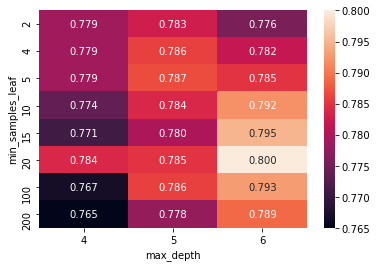

In [74]:
# Displaying the result with heatmap
sns.heatmap(pivoted_scores_df, annot=True, fmt='.3f')

Setting the `max_depth` and `min_samples_leaf` to 6 and 20 respectively returned the best evaluation score.

Now, using the parameter above for the final decision tree model:

In [75]:
df = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
df.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)

### ENSEMBLE AND RANDOM FOREST MODEL
* Ensemble models
* Random Forest: ensemble decision tree
* Tunning Random Forest: `n_estimtors`, `max_depth`, `min_samples_leaf`

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
# using an ensemble of 10 decision trees
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [99]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8135545556805399

In [106]:
# using different number of estimators

scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, round(auc, 3)))
    
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [107]:
df_scores.head()

,n_estimators,auc
0,10,0.814
1,20,0.835
2,30,0.833
3,40,0.830
4,50,0.832


Text(0, 0.5, 'AUC Sore')

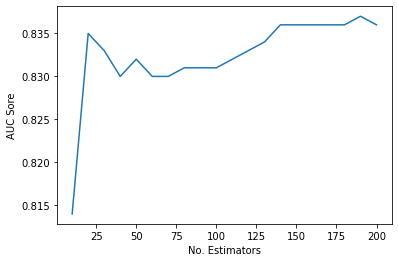

In [109]:
# plotting the n_estimator and auc
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel('No. Estimators')
plt.ylabel('AUC Sore')

Because Random Forest is an ensemble of Decision Trees, it has the same parameer as in Decision Trees that can be tunned.

In [135]:
n = 200

In [119]:
scores = []
for d in [5,10,15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, round(auc, 3)))
    
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])

In [120]:
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.817
1,5,20,0.822
2,5,30,0.822
3,5,40,0.825
4,5,50,0.829


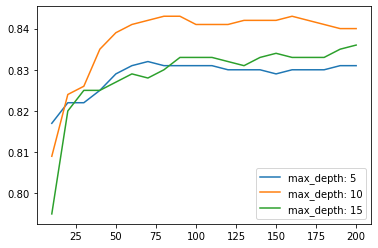

In [121]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'max_depth: {d}')
    plt.legend()

In [122]:
# saving the maximum depth with the highest auc score
max_depth = 10

In [125]:
# now tunning the min_samples_leaf
scores = []
for m in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((m, n, round(auc, 3)))
    
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf', 'n_estimators', 'auc'])

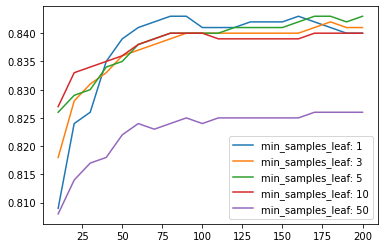

In [126]:
for m in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == m]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f'min_samples_leaf: {m}')
    plt.legend()

In [127]:
# using min_samples leaf of 1
min_samples_leaf = 1

Now using the Random Forest model with the selected prameters:

In [136]:
rf = RandomForestClassifier(n_estimators=n, 
                            max_depth=max_depth, 
                            min_samples_leaf=min_samples_leaf, 
                            random_state=1)

In [137]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=1)

In [138]:
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.8403750355381403

Other useful parameters: `max_features`, `botstrap`

### GRADIENT BOOSTING

A different way of combining combining multiple Decision Trees into one ensemble.

In [141]:
!pip install xgboost

In [142]:
import xgboost as xgb

In [151]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, y_train, feature_names=features)
dval = xgb.DMatrix(X_val, y_val, feature_names=features)

In [157]:
xgb_params = {
    'eta': 0.3, # learning rate
    'max_depth': 6,
    'min_child_weight': 1, # same as min_samples_leaf
    'ojective': 'binary:logistic',
    'nthread': 2, # no. of cores
    'seed': 1,
    'verbosity':1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200) # num_boost_round = number of trees

[12:06:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "ojective" } are not used.



In [158]:
y_pred = model.predict(dval)

In [159]:
roc_auc_score(y_val, y_pred)

0.8125934807599601

It is possible to monitor the trsining performance of the xgboost model. I.e, after each model is trained, we can evaluate it on validation data.

In [160]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [172]:
# capturing the output below into a variable called output
# %%capture output

xgb_params = {
    'eta': 0.3, # learning rate
    'max_depth': 6,
    'min_child_weight': 1, # same as min_samples_leaf
    'ojective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread': 2, # no. of cores
    'seed': 1,
    'verbosity':1
}

model = xgb.train(xgb_params, 
                  dtrain, num_boost_round=200, # num_boost_round = number of trees
                  verbose_eval = 5, # print evaluation score every 5 steps
                  evals=watchlist) 

[12:47:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "ojective" } are not used.

[0]	train-auc:0.85852	val-auc:0.78566
[5]	train-auc:0.93494	val-auc:0.81456
[10]	train-auc:0.95947	val-auc:0.82194
[15]	train-auc:0.97302	val-auc:0.82395
[20]	train-auc:0.98007	val-auc:0.82304
[25]	train-auc:0.98498	val-auc:0.82344
[30]	train-auc:0.98860	val-auc:0.82015
[35]	train-auc:0.99218	val-auc:0.82395
[40]	train-auc:0.99386	val-auc:0.82191
[45]	train-auc:0.99593	val-auc:0.82069
[50]	train-auc:0.99770	val-auc:0.82243
[55]	train-auc:0.99840	val-auc:0.82313
[60]	train-auc:0.99903	val-auc:0.82036
[65]	train-auc:0.99936	val-auc:0.81966
[70]	train-auc:0.99966	val-auc:0.81876
[75]	train-auc:0.99979	val-auc:0.81774
[80]	train-auc:0.99989	val-auc:0.81867
[85]	train-auc:0.99994	val-auc:0.81658
[90]	train-auc:0.99997	val-auc:0.81466
[95]	train-auc:0.99999	val-auc:0.81522
[100]	train-auc:0.99999	

### SELECTING THE MODEL

* Choosing between xgboost, random forest or decision tree
* Training the final model
* Saving the final model

Creating and training the model with the best parameters.

In [175]:
df = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
df.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)

In [180]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.8049636447398636

In [181]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3, 
                            random_state=1)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [182]:
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.8414442700156985

In [183]:
xgb_params = {
    'eta': 0.1, # learning rate
    'max_depth': 1,
    'min_child_weight': 1, # same as min_samples_leaf
    'ojective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread': 2, # no. of cores
    'seed': 1,
    'verbosity':1
}

model = xgb.train(xgb_params, 
                  dtrain, num_boost_round=175, # num_boost_round = number of trees
                  verbose_eval = 5 # print evaluation score every 5 steps
                  ) 

[18:54:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "ojective" } are not used.



In [184]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8347754607597128

### Now Training The Whole Dataset

In [206]:
df_full_train = full_train.reset_index(drop=True) 

In [207]:
y_full_train = (full_train.status == 'default').astype('int').values

In [215]:
# remove the target column
del df_full_train['status']

In [216]:
# convert train data to dictionary and then vectorize it
dict_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dict_full_train)

In [217]:
# convert the test data to dictionary then vectorize it
dict_test = test.to_dict(orient='records')

X_test = dv.transform(dict_test)

In [218]:
# using the xgboost model
dfulltrain = xgb.DMatrix(X_full_train, y_full_train, feature_names=dv.get_feature_names())

# we mon't be using the y_test here because we won't be evaluating the model here. 
dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [219]:
xgb_params = {
    'eta': 0.1, # learning rate
    'max_depth': 1,
    'min_child_weight': 1, # same as min_samples_leaf
    'ojective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread': 2, # no. of cores
    'seed': 1,
    'verbosity':1
}


model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

[19:37:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "ojective" } are not used.



In [220]:
y_pred = model.predict(dtest)

In [221]:
roc_auc_score(y_test, y_pred)

0.8288349131593732

### SAVING THE MODEL

In [222]:
import pickle

In [224]:
with open('CredicScoreModel.bin', 'wb') as file:
    pickle.dump((dv, model), file)